In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"


columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv(url, sep='\s+', names=columns, na_values='?')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [3]:
# 결측치 제거
data=df.dropna()
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [4]:
data = pd.get_dummies(data, columns=['car name'])
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name_amc ambassador brougham,car name_amc ambassador dpl,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,False,False,...,False,False,False,False,False,False,False,False,False,False
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,False,False,...,False,False,False,False,False,False,False,False,False,False
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,False,False,...,False,False,False,False,False,False,False,False,False,False
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,False,False,...,False,False,False,False,False,False,False,False,False,False
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,False,False,...,False,False,False,False,False,False,False,False,False,False
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,False,False,...,False,False,False,False,False,False,True,False,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,False,False,...,False,False,False,False,False,False,False,False,False,False
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
X=data.drop('mpg',axis=1).astype('float32')
X.shape

(392, 308)

In [6]:
Y=data['mpg'].values
Y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 19. ,
       16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. , 13. ,
       18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. , 27. ,
       26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. , 17. ,
       11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. , 22. ,
       21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. , 14. ,
       15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. , 18. ,
       18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. , 22. ,
       18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. , 15. ,
       24. , 20. , 11. , 20. , 19. , 15. , 31. , 26. , 32. , 25. , 16. ,
       16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. , 26. , 31. ,
       32. , 28. , 24. , 26. , 24. , 26. , 31. , 19

In [7]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# 윈도우 크기를 설정하고, 데이터를 3차원으로 변환 (타임스텝 적용)
def create_windows(X, y, window_size):
    X_windows = []
    y_windows = []
    for i in range(len(X) - window_size):
        X_windows.append(X[i:i+window_size])  # window_size만큼의 과거 데이터를 사용
        y_windows.append(y[i+window_size])    # 그 다음 값을 예측
    return np.array(X_windows), np.array(y_windows)

window_size = 3  # 3개의 타임스텝을 사용
X_windows, Y_windows = create_windows(X_scaled, Y, window_size)
print (X_windows)
print (Y_windows)

[[[1.         0.61757106 0.45652175 ... 0.         0.         0.        ]
  [1.         0.72868216 0.6467391  ... 0.         0.         0.        ]
  [1.         0.64599484 0.56521744 ... 0.         0.         0.        ]]

 [[1.         0.72868216 0.6467391  ... 0.         0.         0.        ]
  [1.         0.64599484 0.56521744 ... 0.         0.         0.        ]
  [1.         0.6098191  0.56521744 ... 0.         0.         0.        ]]

 [[1.         0.64599484 0.56521744 ... 0.         0.         0.        ]
  [1.         0.6098191  0.56521744 ... 0.         0.         0.        ]
  [1.         0.60465115 0.51086956 ... 0.         0.         0.        ]]

 ...

 [[0.19999999 0.21447028 0.23913044 ... 0.         0.         0.        ]
  [0.19999999 0.18604653 0.21739131 ... 0.         0.         0.        ]
  [0.19999999 0.07493539 0.03260869 ... 0.         0.         0.        ]]

 [[0.19999999 0.18604653 0.21739131 ... 0.         0.         0.        ]
  [0.19999999 0.07493539

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_windows, Y_windows, test_size=0.2, random_state=0)

In [10]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Conv1D 모델 생성
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))  # 분류 문제일 경우

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [11]:
N_EPOCHS = 30

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))

Epoch 1/30


2024-10-24 11:05:17.006198: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/10 [==============================] - 0s 13ms/step - loss: 608.7855 - mse: 608.7855 - val_loss: 564.7357 - val_mse: 564.7357
Epoch 2/30
10/10 [==============================] - 0s 3ms/step - loss: 576.3035 - mse: 576.3035 - val_loss: 519.5930 - val_mse: 519.5930
Epoch 3/30
10/10 [==============================] - 0s 3ms/step - loss: 510.0149 - mse: 510.0149 - val_loss: 431.3850 - val_mse: 431.3850
Epoch 4/30
10/10 [==============================] - 0s 3ms/step - loss: 394.4547 - mse: 394.4547 - val_loss: 296.2390 - val_mse: 296.2390
Epoch 5/30
10/10 [==============================] - 0s 3ms/step - loss: 237.7844 - mse: 237.7844 - val_loss: 159.4922 - val_mse: 159.4922
Epoch 6/30
10/10 [==============================] - 0s 3ms/step - loss: 121.2951 - mse: 121.2951 - val_loss: 102.2758 - val_mse: 102.2758
Epoch 7/30
10/10 [==============================] - 0s 3ms/step - loss: 86.0651 - mse: 86.0651 - val_loss: 94.1063 - val_mse: 94.1063
Epoch 8/30
10/10 [==============================

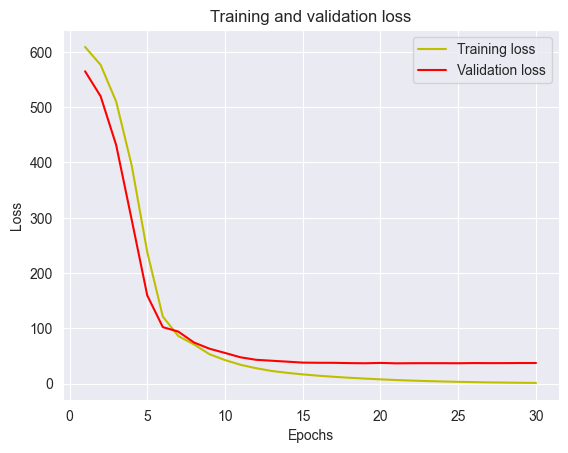

In [12]:
import matplotlib.pyplot as plt

loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

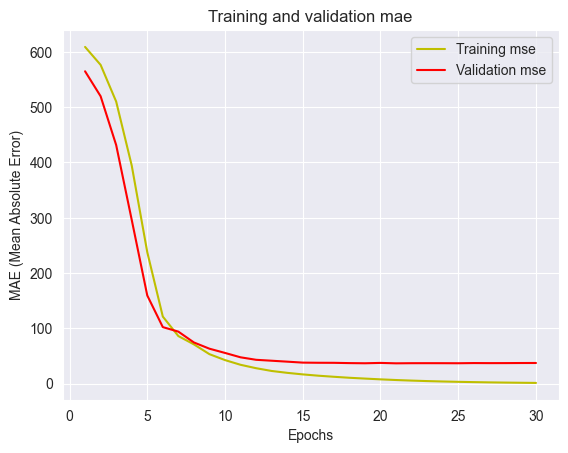

In [13]:
mae =history.history['mse']
val_mae = history.history['val_mse']
plt.plot(epochs, mae, 'y', label='Training mse')
plt.plot(epochs, val_mae, 'r', label='Validation mse')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE (Mean Absolute Error)')
plt.legend()
plt.show()

In [14]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 37.4341 - mse: 37.4341


[37.43409729003906, 37.43409729003906]